## Problem 2

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import ClassifierChain

In [2]:
mnist = fetch_openml('mnist_784', as_frame = False)

In [3]:
X, y = mnist.data, mnist.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [5]:
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

for i in range(10):
    percentage = ((counts_test[i] / (counts_test[i] + counts_train[i]) * 100).round(2))
    print("Class:", i,":", percentage, "in test set")

Class: 0 : 14.99 in test set
Class: 1 : 15.3 in test set
Class: 2 : 14.58 in test set
Class: 3 : 15.14 in test set
Class: 4 : 14.19 in test set
Class: 5 : 15.37 in test set
Class: 6 : 14.67 in test set
Class: 7 : 15.22 in test set
Class: 8 : 14.89 in test set
Class: 9 : 15.62 in test set


We can see that the ratio of all classes is approximately 15%.

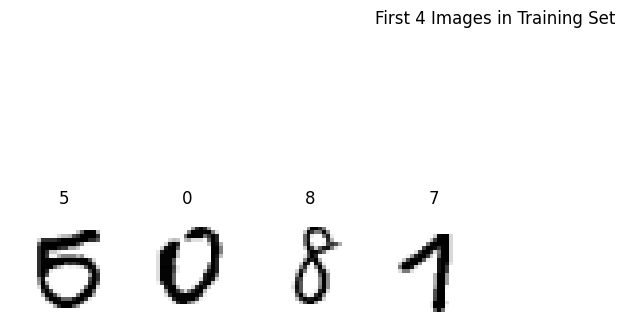

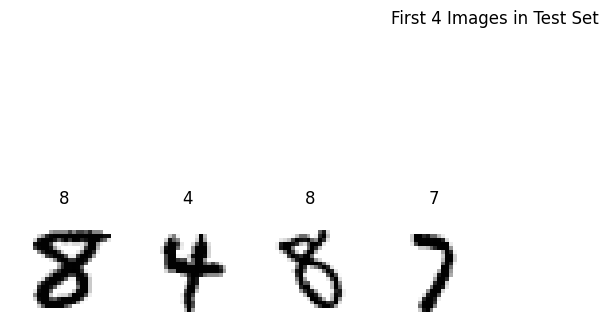

In [6]:
def plot_digit(image_data, digit):
    image = image_data.reshape(28, 28)
    plt.title(digit)
    plt.imshow(image, cmap='binary')
    plt.axis('off')

plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 8, i + 1)
    train_digit = X_train[i]
    label_digit = y_train[i]
    plot_digit(train_digit, label_digit)
plt.suptitle("First 4 Images in Training Set")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 8, i + 1)
    test_digit = X_test[i]
    label_digit = y_test[i]
    plot_digit(test_digit, label_digit)
plt.suptitle("First 4 Images in Test Set")
plt.tight_layout()
plt.show()

In [7]:
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_train_even = (y_train.astype('int8') % 2 == 0)

y_test_odd = (y_test.astype('int8') % 2 == 1)
y_test_even = (y_test.astype('int8') % 2 == 0)

y_multilabel = np.c_[y_train_odd, y_train_even]
y_test_multilabel = np.c_[y_test_odd, y_test_even]

In [8]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.fit(X_test)
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [9]:
y_train_knn = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

In [10]:
print("accuracy = ", accuracy_score(y_multilabel, y_train_knn), 
                                   "\n recall = ", recall_score(y_multilabel, y_train_knn, average='macro'),
                                   "\n precision = ", precision_score(y_multilabel, y_train_knn, average ='macro'))

accuracy =  0.9819159663865547 
 recall =  0.9818136681840115 
 precision =  0.9821225861831775


In [11]:
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_even)

DummyClassifier()

In [12]:
cross_val_score(dummy_clf, X_train, y_multilabel, cv=3, scoring="accuracy")

array([0.50675608, 0.50410931, 0.50824384])

We can see that the predictive performance of the dummy model is approximately 50%. The performace of our model is much better.

In [13]:
cm = confusion_matrix(y_multilabel.argmax(axis=1), y_train_knn.argmax(axis=1))
print(cm)

[[29823   306]
 [  770 28601]]


In [14]:
knn_clf2 = KNeighborsClassifier()
knn_clf2.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [15]:
y_pred = knn_clf2.predict(X_test)

In [16]:
cm_test = confusion_matrix(y_test_multilabel.argmax(axis=1), y_pred.argmax(axis=1))
print(cm_test)

[[5400   53]
 [ 124 4923]]


In [17]:
for i in range(2):
    for j in range(2):
        print((cm_test[i][j] / cm[i][j]).round(2) * 100, "%")

18.0 %
17.0 %
16.0 %
17.0 %


We observe that the ratio of the elements in the confusion matrix of the test set to those in the confusion matrix of the train set is approximately 15%, which corresponds to the ratio of the sizes of the test and training set.

In [18]:
for i in range(len(y_pred)):
    if y_pred[i][0] == True and y_pred[i][1] == False and y_test_multilabel[i][0] == False and y_test_multilabel[i][1] == True:
        false_positive_index = i
        break

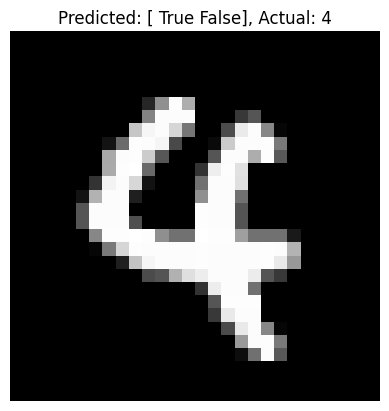

In [19]:
false_positive_image = X_test[false_positive_index].reshape(28, 28)
predicted_label = y_pred[false_positive_index]
actual_label = y_test[false_positive_index]
plt.imshow(false_positive_image, cmap='gray')
plt.title(f'Predicted: {predicted_label}, Actual: {actual_label}')
plt.axis('off')
plt.show()

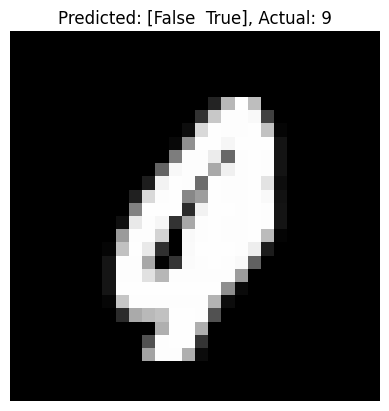

In [20]:
for i in range(len(y_pred)):
    if y_pred[i][0] == False and y_pred[i][1] == True and y_test_multilabel[i][0] == True and y_test_multilabel[i][1] == False:
        false_negative_index = i
        break

false_negative_image = X_test[false_negative_index].reshape(28, 28)
predicted_label = y_pred[false_negative_index]
actual_label = y_test[false_negative_index]
plt.imshow(false_negative_image, cmap='gray')
plt.title(f'Predicted: {predicted_label}, Actual: {actual_label}')
plt.axis('off')
plt.show()

We can see that in the false positive the actual image is 4, which is even, but the prediction is odd and in the false negative the actual image is 9 which is odd but the prediction is even.